# Shortest Path

# Time Minimum directed spanning tree

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [3]:
data_point = pd.read_csv('centros_googleApi')

In [4]:
centros = list(data_point['cluster_point'])

# Grafo de tiempo

In [5]:
graph = nx.Graph()

In [6]:
centros[0].replace('(','').replace(')','').split(',')

['-78.50040125', ' -0.20248826666666667']

In [7]:
pos_graph = []
lab_dict = {}
for i,centro in enumerate(centros):
    graph.add_node(i)
    lab_dict[i] = str(i)
    pos = centro.replace('(','').replace(')','').split(',')
    pos_graph.append((float(pos[0]),float(pos[1])))

In [8]:
time_data = pd.read_csv('time_matrix.csv')

In [9]:
time_matrix = time_data.iloc[:,1:].values

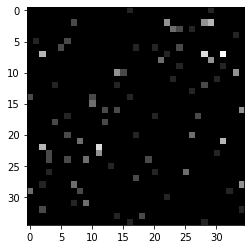

In [10]:
plt.imshow(time_matrix,'gray')

In [11]:
time_graph = nx.DiGraph(time_matrix)

In [12]:
time_graph.edges

OutEdgeView([(0, 16), (0, 29), (2, 7), (2, 22), (2, 28), (2, 29), (3, 23), (3, 24), (3, 26), (4, 33), (5, 1), (5, 6), (6, 5), (6, 17), (6, 20), (6, 24), (7, 2), (7, 22), (7, 28), (7, 31), (8, 21), (8, 29), (9, 24), (9, 31), (10, 14), (10, 15), (10, 33), (11, 23), (11, 30), (12, 4), (12, 14), (12, 28), (13, 26), (14, 0), (14, 10), (14, 16), (15, 10), (16, 12), (16, 14), (16, 34), (17, 6), (17, 20), (17, 27), (18, 4), (18, 12), (20, 6), (20, 17), (20, 26), (21, 8), (21, 31), (22, 2), (22, 11), (23, 3), (23, 11), (23, 30), (24, 3), (24, 6), (24, 9), (24, 19), (25, 13), (26, 3), (26, 20), (26, 25), (27, 17), (28, 2), (28, 7), (28, 34), (29, 0), (29, 8), (29, 32), (30, 22), (31, 7), (31, 9), (32, 2), (32, 34), (33, 14), (33, 18), (34, 16), (34, 28)])

In [12]:
time_graph.edges[(7,31)]

{'weight': 7.0}

In [13]:
time_labels = nx.get_edge_attributes(time_graph,'weight')

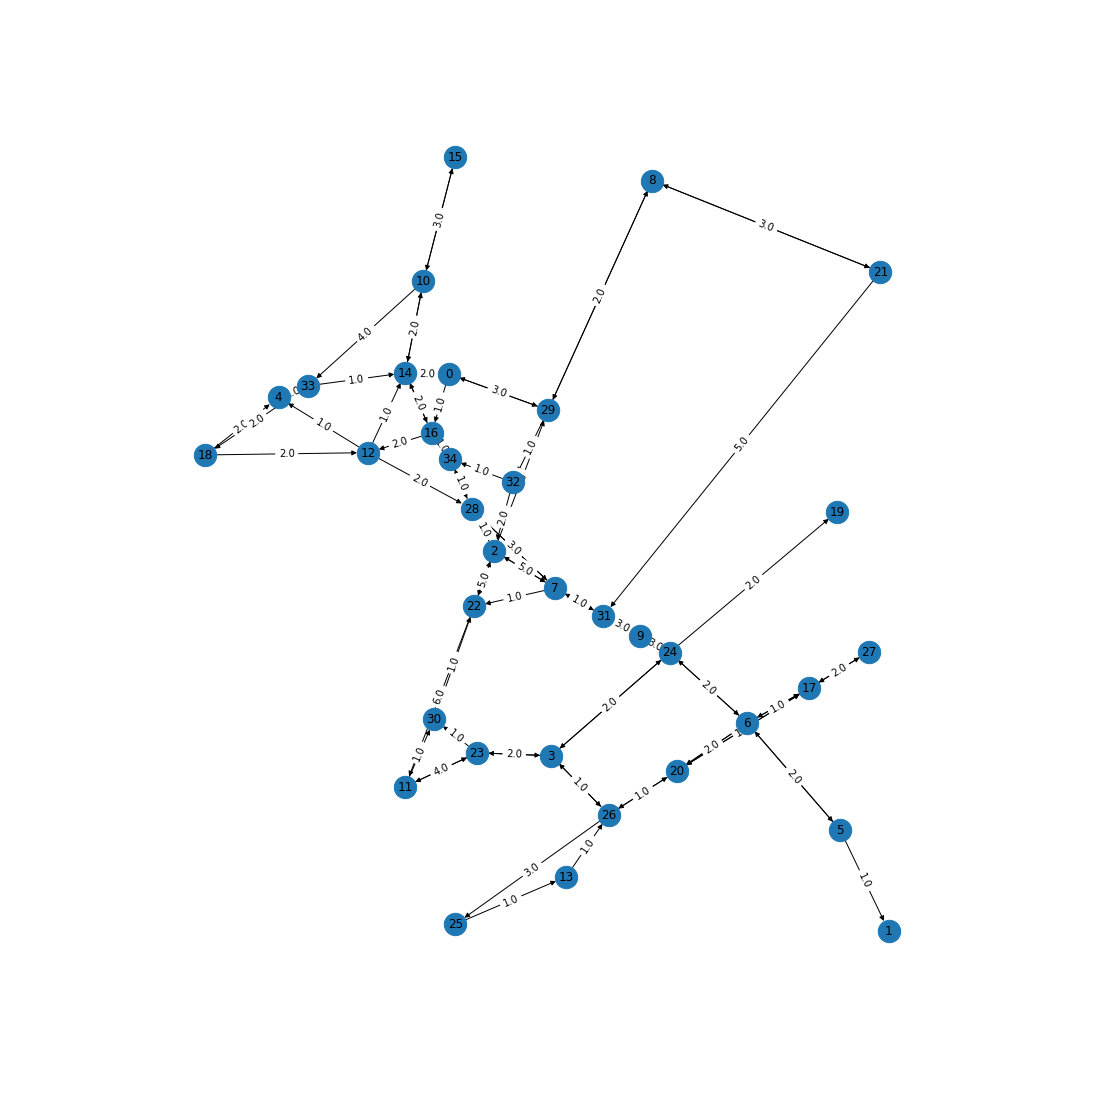

In [14]:
plt.figure(figsize=(15,15))

nx.draw(time_graph,pos_graph,
            node_size=500,
            labels=lab_dict, 
            with_labels = True)

nx.draw_networkx_edge_labels(time_graph,pos_graph,edge_labels=time_labels)

plt.show()

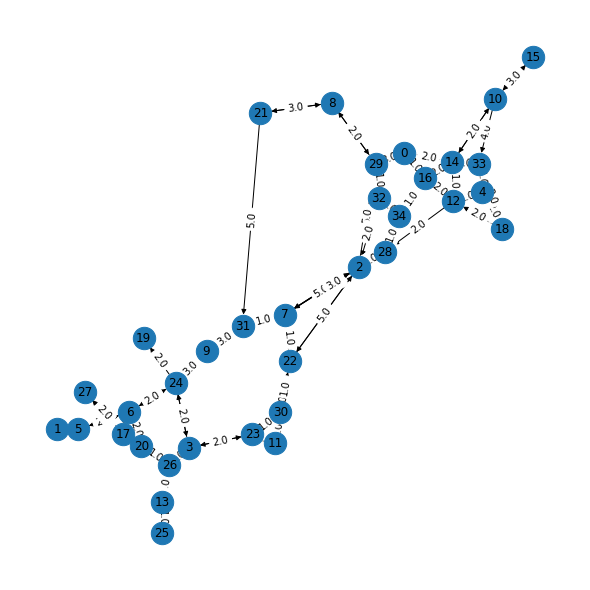

In [15]:
plt.figure(figsize=(8,8))

pos = nx.kamada_kawai_layout(time_graph)
nx.draw(time_graph,pos,
            node_size=500,
            labels=lab_dict, 
            with_labels = True)
nx.draw_networkx_edge_labels(time_graph,pos,edge_labels=time_labels)
plt.show()

In [16]:
adj_matrix = data_point.iloc[:,1:-1].values

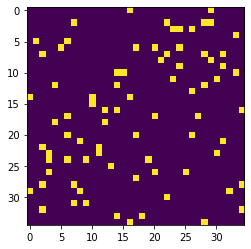

In [17]:
plt.imshow(adj_matrix)

In [18]:
adj_graph = nx.DiGraph(adj_matrix)

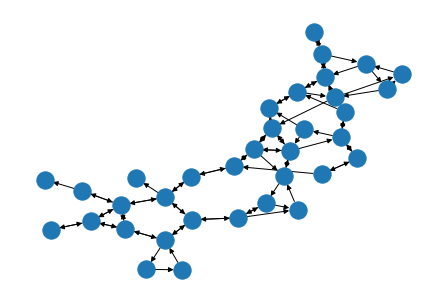

In [19]:
nx.draw_kamada_kawai(adj_graph)

## Edmonds’ algorithm

Algoritmo para MDST.

In [17]:
MDST_time = nx.algorithms.tree.Edmonds(time_graph)

In [18]:
minimum_graph = MDST_time.find_optimum()

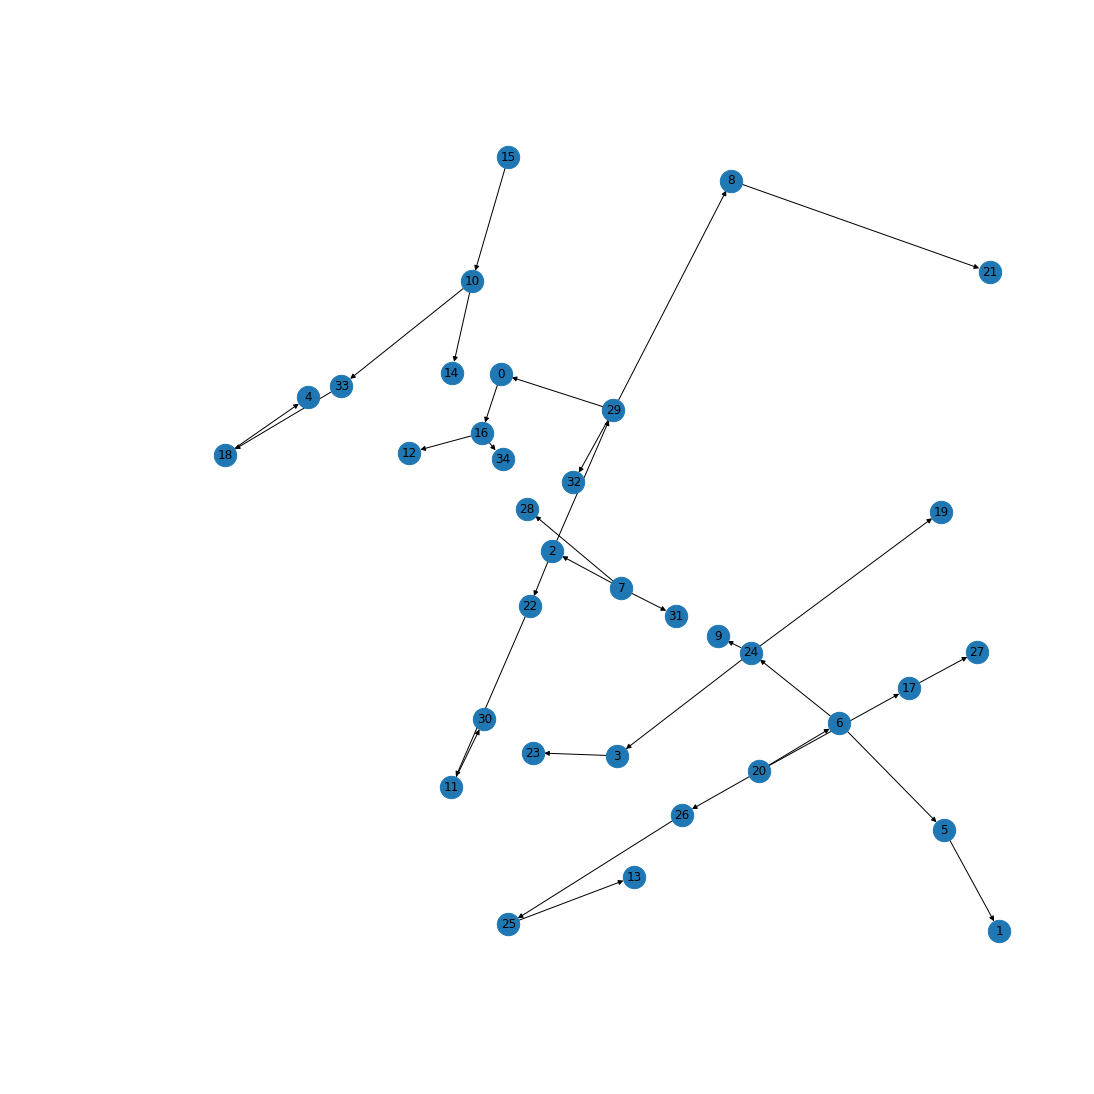

In [19]:
plt.figure(figsize=(15,15))
pos = nx.kamada_kawai_layout(minimum_graph)

nx.draw(minimum_graph,
        pos_graph,
            node_size=500,
            labels=lab_dict, 
            with_labels = True)

In [83]:
minimum_graph.edges

OutEdgeView([(0, 16), (2, 22), (2, 29), (3, 23), (5, 1), (6, 5), (6, 24), (7, 2), (7, 28), (7, 31), (8, 21), (10, 14), (10, 33), (11, 30), (15, 10), (16, 12), (16, 34), (17, 27), (18, 4), (20, 6), (20, 17), (20, 26), (22, 11), (24, 3), (24, 9), (24, 19), (25, 13), (26, 25), (29, 0), (29, 8), (29, 32), (33, 18)])

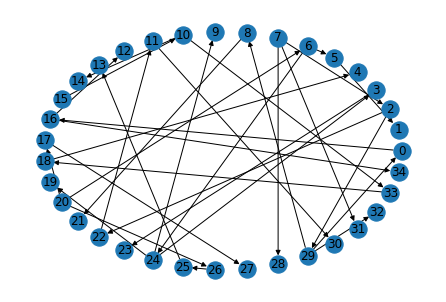

In [29]:
nx.draw_circular(minimum_graph,
                 labels=lab_dict, 
            with_labels = True)

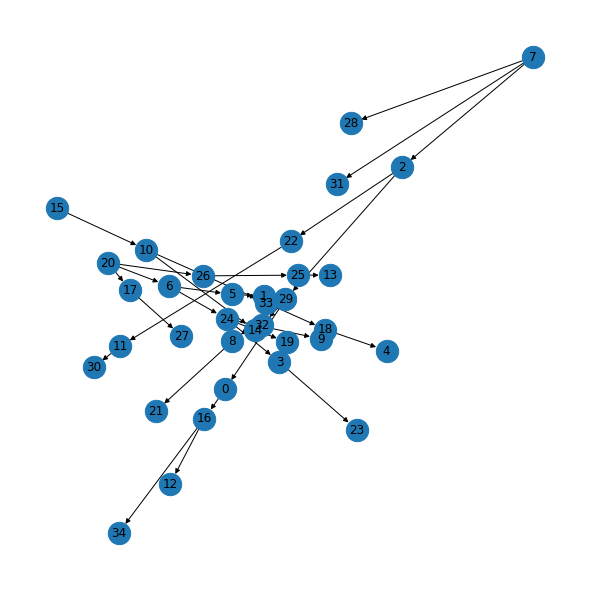

In [27]:
plt.figure(figsize=(8,8))

pos = nx.kamada_kawai_layout(minimum_graph)
nx.draw(minimum_graph,pos,
            node_size=500,
            labels=lab_dict, 
            with_labels = True)
#nx.draw_networkx_edge_labels(time_graph,pos,edge_labels=time_labels)
plt.show()

## Shortest path

In [12]:
nx.shortest_path(time_graph,15,11)

[15, 10, 14, 0, 29, 32, 2, 22, 11]

In [14]:
time_graph.edges[(22,11)]

{'weight': 6.0}